In [22]:
import numpy as np
from scipy import linalg
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import math
from scipy import integrate
from numpy.linalg import inv
import functools

# **PART 1 - Q2**


In [56]:
def MLE1(X, y):
    X_t = X.transpose()
    return np.inv(X_t*X)*X_t*y

#**PART 1 - Q5**

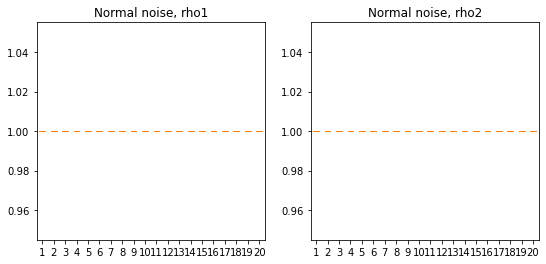

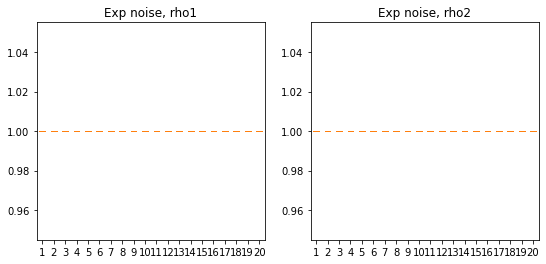

In [57]:
p = 400


def generate_dataset(beta_star, n, noise):
    X = np.random.uniform(0, 1, (p, n))

    if noise == 'normal':
        eps = np.random.uniform(0, 1, n)

    else:  # noise == 'exp'
        eps = np.random.laplace(0, 1, n)

    Y = np.dot(np.transpose(X), beta_star) + eps
    return X, Y


def rho1(t):
    return np.abs(t)


def rho2(t):
    return t*t/2


nb_kappa = 5
nb_simu = 20
n_tab = np.linspace(1, p-1, nb_kappa, dtype='int')
kappa_tab = np.zeros(nb_kappa)
beta_star = np.random.normal(0, 1, p)
noise1 = 'normal'
noise2 = 'exp'
error_tab_rho1_noise1 = np.zeros((nb_kappa, nb_simu))
error_tab_rho2_noise1 = np.zeros((nb_kappa, nb_simu))
error_tab_rho1_noise2 = np.zeros((nb_kappa, nb_simu))
error_tab_rho2_noise2 = np.zeros((nb_kappa, nb_simu))

for i in range(nb_kappa):
    n = n_tab[i]
    kappa_tab[i] = p/n
    for j in range(nb_simu):
        dataset1 = generate_dataset(beta_star, n, noise1)
        dataset2 = generate_dataset(beta_star, n, noise2)
        error_tab_rho1_noise1[i, j] = 1#MLE(dataset1, rho1)  #mettre fonction MLE question precedente
        error_tab_rho2_noise1[i, j] = 1#MLE(dataset1, rho2)
        error_tab_rho1_noise2[i, j] = 1#MLE(dataset2, rho1)
        error_tab_rho2_noise2[i, j] = 1#MLE(dataset2, rho2)

fig1, (ax11, ax12) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
fig2, (ax21, ax22) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

bplot11 = ax11.boxplot(error_tab_rho1_noise1)
ax11.set_title('Normal noise, rho1')

bplot12 = ax12.boxplot(error_tab_rho2_noise1)
ax12.set_title('Normal noise, rho2')

bplot21 = ax21.boxplot(error_tab_rho1_noise2)
ax21.set_title('Exp noise, rho1')

bplot22 = ax22.boxplot(error_tab_rho2_noise2)
ax22.set_title('Exp noise, rho2')

plt.show()

##**PART 2 Q4**

In [4]:
def prox_quad(x, c):
    return x / (1 + c)


def prox_quad_prime(x, c):
    return 1 / (1 + c)


def prox_abs(x, c):
    return np.sign(x)*(np.max((0, np.abs(x) - c)))


def prox_abs_prime(x, c):
    if (x > c) | (-x > c):
        return 1
    return 0

In [5]:
def F_r(t, r):
    return stats.norm.cdf(t / r) + np.exp(r ** 2 / 2) / 2 * (
                np.exp(t) * stats.norm.pdf(-(t + r ** 2) / r) - np.exp(-t) * stats.norm.cdf((t - r ** 2) / r))

In [6]:
def F_kappa(t, r, kappa):
    return F_r(t, r) - (1 - kappa) / 2


def bisection_inverse_F_bar(a, b, r, kappa, stepmax=100, tol=1e-5):
    if np.sign(F_kappa(a, r, kappa)) == 0: return a
    if np.sign(F_kappa(b, r, kappa)) == 0: return b

    if np.sign(F_kappa(a, r, kappa)) * np.sign(F_kappa(b, r, kappa)) > 0: return print("no root")

    for step in range(1, stepmax + 1):

        c = (a + b) / 2

        if np.sign(F_kappa(c, r, kappa)) == 0: return c

        if np.abs((b - a) / 2) < tol: return (b + a) / 2

        if np.sign(F_kappa(c, r, kappa)) * np.sign(F_kappa(a, r, kappa)) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2

In [7]:
def F_r_final(r, kappa):
    a_inf = -100
    b_max = 100
    T = bisection_inverse_F_bar(a_inf, b_max, r, kappa)
    G = functools.partial(F_r, r)
    fun = lambda x: x * G(x)
    return kappa * r ** 2 - 4 * integrate.quad(fun, 0, T)[0]

<ipython-input-9-dcf715e0e2c2>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return stats.norm.cdf(t / r) + np.exp(r ** 2 / 2) / 2 * (
<ipython-input-9-dcf715e0e2c2>:3: RuntimeWarning: divide by zero encountered in double_scalars
  np.exp(t) * stats.norm.pdf(-(t + r ** 2) / r) - np.exp(-t) * stats.norm.cdf((t - r ** 2) / r))
<ipython-input-9-dcf715e0e2c2>:2: RuntimeWarning: invalid value encountered in double_scalars
  return stats.norm.cdf(t / r) + np.exp(r ** 2 / 2) / 2 * (
<ipython-input-9-dcf715e0e2c2>:3: RuntimeWarning: invalid value encountered in double_scalars
  np.exp(t) * stats.norm.pdf(-(t + r ** 2) / r) - np.exp(-t) * stats.norm.cdf((t - r ** 2) / r))
<ipython-input-9-dcf715e0e2c2>:2: RuntimeWarning: overflow encountered in exp
  return stats.norm.cdf(t / r) + np.exp(r ** 2 / 2) / 2 * (
<ipython-input-11-da409beae40b>:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The e

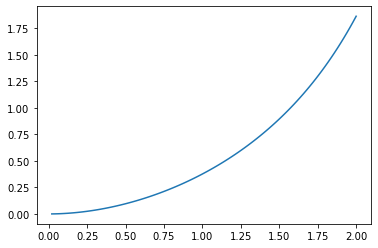

In [12]:
kappa = 0.5
r_values = np.linspace(0,2,num=100)
F_r_final_values = [F_r_final(r, kappa) for r in r_values]
plt.plot(r_values, F_r_final_values)

In [13]:
def bisection_r(kappa, stepmax=100, tol=1e-5):
    a = 0.1
    b = 1.5

    if np.sign(F_r_final(a, kappa)) == 0: return a
    if np.sign(F_r_final(b, kappa)) == 0: return b
    # print(F_r_final(a,kappa),"\n")
    # print(F_r_final(b,kappa),"\n")

    if np.sign(F_r_final(a, kappa)) * np.sign(F_r_final(b, kappa)) > 0: return print("no root")

    for step in range(1, stepmax + 1):

        c = (a + b) / 2

        # print(F_r_final(c,kappa),"\n")
        if np.sign(F_r_final(c, kappa)) == 0: return c

        if np.abs((b - a) / 2) < tol: return (b + a) / 2

        if np.sign(F_r_final(c, kappa)) * np.sign(F_r_final(a, kappa)) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2

print(bisection_r(0.5))

no root
None


##**PART 2 Q5**

In [8]:
from random import gauss
from math import sqrt
from scipy.stats import laplace

In [52]:
def monte_carlo_expectancy(r,c, Nsim = 1e5):
  eps1 = np.random.laplace(size=(int(Nsim),)) #laplace()
  eps2 = np.random.normal(0,1, size = (int(Nsim),)) #gaussian(0,1)
  z = eps1+r*eps2 #zepsilon variable

  f1 = lambda z: (z-prox_abs(z,c))**2
  f2 = lambda z: prox_abs_prime(z,c)
  E1 = np.array(list(map(f1, z)))
  E2 = np.array(list(map(f2, z)))

  return np.sum(E1)/Nsim,np.sum(E2)/Nsim

In [53]:
def F(r, c):
  E1, E2 = monte_carlo_expectancy(r,c)
  return sqrt(E1/(1-E2))

In [54]:
def solve_iteration(c, err=1e-2) :
  r1 = 0.1
  r2 = 1
  stop = 1000
  iter = 0
  while (abs(r1-r2)>1e-2 and iter<stop): 
    r1 = r2
    r2 = F(r1,c)
    iter +=1
  if iter>=stop : 
    print("stop iter = 1000")
  return r2

In [55]:
def kappa_quad(r):
  return 1-(1/(1+c))

def kappa_abs(r,c, Nsim= 1e6):
  eps1 = np.random.laplace(size=(int(Nsim),)) #laplace()
  eps2 = np.random.normal(0,1, size = (int(Nsim),)) #gaussian(0,1)
  z = eps1+r*eps2 #zepsilon variable
  f2 = lambda z: prox_abs_prime(z,c)
  E2 = np.array(list(map(f2, z)))
  return 1-np.sum(E2)/Nsim

In [56]:
c = 1.0
r = solve_iteration(c)
kappa = kappa_abs(r,c)
print(r, kappa)

1.2896879387990459 0.426766


<ipython-input-53-379b614f283f>:3: RuntimeWarning: invalid value encountered in double_scalars
  return sqrt(E1/(1-E2))


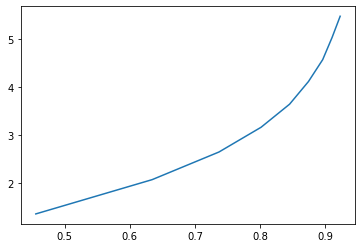

In [61]:
c_values = np.linspace(0.01,10, 100) #10) cest bcp environ 10min pour tourner 
r_values = [solve_iteration(c) for c in c_values]
kappa_values = [kappa_abs(r_values[i], c_values[i]) for i in range(10)]
plt.xlabel('r values')
plt.ylabel('kappa values')
plt.plot(kappa_values, r_values)

In [62]:
r_values

[nan,
 1.3675078399389775,
 2.0784423709604303,
 2.651925781611576,
 3.165181046982189,
 3.643528243330746,
 4.114263578648426,
 4.567840473198545,
 5.028337551951284,
 5.468280430286348]

In [63]:
kappa_values

[1.0,
 0.45536299999999996,
 0.6342639999999999,
 0.73705,
 0.801781,
 0.845599,
 0.874686,
 0.896548,
 0.9109970000000001,
 0.923396]